In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('amz_uk_price_prediction_dataset.csv')

In [3]:
print(df.head())
print(df.shape)
print(df.columns)

   uid        asin                                              title  stars  \
0    1  B09B96TG33  Echo Dot (5th generation, 2022 release) | Big ...    4.7   
1    2  B01HTH3C8S  Anker Soundcore mini, Super-Portable Bluetooth...    4.7   
2    3  B09B8YWXDF  Echo Dot (5th generation, 2022 release) | Big ...    4.7   
3    4  B09B8T5VGV  Echo Dot with clock (5th generation, 2022 rele...    4.7   
4    5  B09WX6QD65  Introducing Echo Pop | Full sound compact Wi-F...    4.6   

   reviews  price  isBestSeller  boughtInLastMonth        category  
0    15308  21.99         False                  0  Hi-Fi Speakers  
1    98099  23.99          True                  0  Hi-Fi Speakers  
2    15308  21.99         False                  0  Hi-Fi Speakers  
3     7205  31.99         False                  0  Hi-Fi Speakers  
4     1881  17.99         False                  0  Hi-Fi Speakers  
(2443651, 9)
Index(['uid', 'asin', 'title', 'stars', 'reviews', 'price', 'isBestSeller',
       'boughtIn

In [4]:
# Part 1: Understanding Product Categories

#Frequency Tables:
freq_categories = df['category'].value_counts()
freq_categories


category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Alexa Built-In Devices                       107
Motorbike Chassis                            107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64

In [5]:
freq_categories.head()

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

In [6]:
# Rename 
freq_categories = df['category'].value_counts().rename(index={"Sports & Outdoors": "Sports", "Handmade Clothing, Shoes & Accessories" : "Handmade Wear", "Bath & Body" : "B&B" })

<Axes: xlabel='category', ylabel='count'>

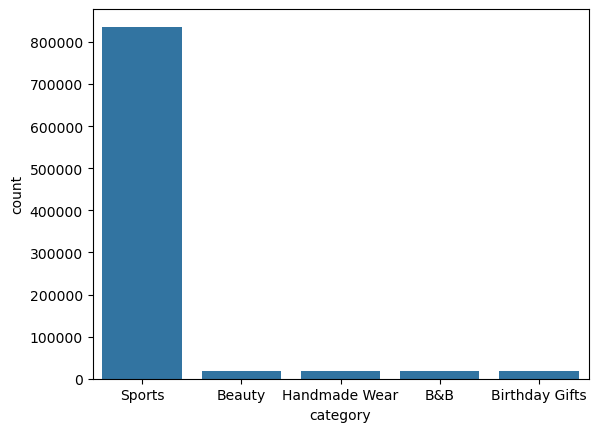

In [7]:
# Visualizations:
freq_df = freq_categories.head(5).reset_index()
freq_df.columns = ['category', 'count']

sns.barplot(data=freq_df, x='category', y='count')

<Axes: ylabel='count'>

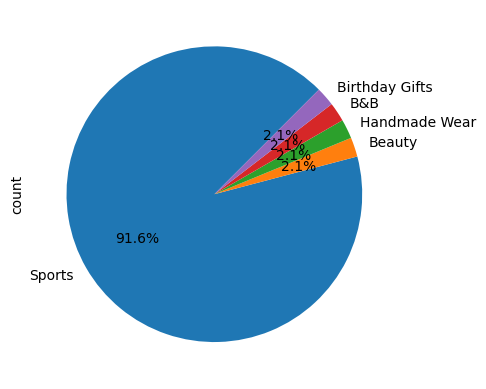

In [8]:
top5 = freq_categories.head(5)
top5.plot.pie(autopct='%1.1f%%', startangle=45)

In [9]:
# Part 2: Delving into Product Pricing

# Measures of Centrality:
print(df['price'].mean())
print(df['price'].median())
print(df['price'].mode()[0])

#The average price is 89, while the most common price is 9.99 which means there are a few products that are very expensive so that increases the average price.


89.24380943923661
19.09
9.99


In [10]:
# Measures of Dispersion:
print(df['price'].var())
print(df['price'].std())
print(df['price'].max() - df['price'].min())

119445.48532256528
345.60886175352226
100000.0


In [11]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)

IQR = Q3 - Q1
IQR

#Hay una alta dispersión de precios. El IQR indica que en el 50% central de los productos se concentra un intervalo de precios relativamente bajo si comparamos con el rango total. Esto nos confirma que hay unos valores atípicos con el precio muy elevado.

np.float64(36.0)

<Axes: xlabel='price', ylabel='Count'>

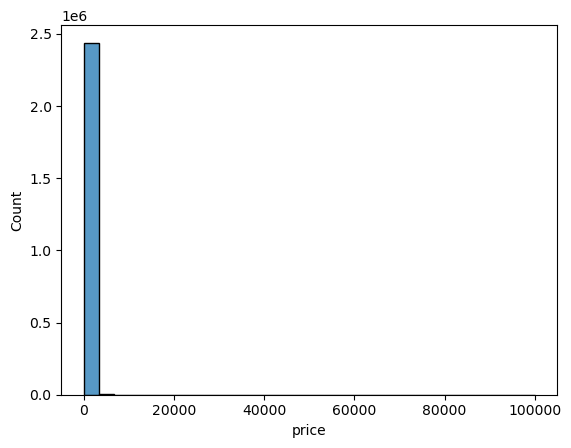

In [12]:
# Visualizations:
sns.histplot(df['price'], bins=30)

# Es difícil leer el histograma ya que hay muchos precios "bajos" y pocos muy altos. Se podría usar menos bins o limitar el rango.

<Axes: ylabel='price'>

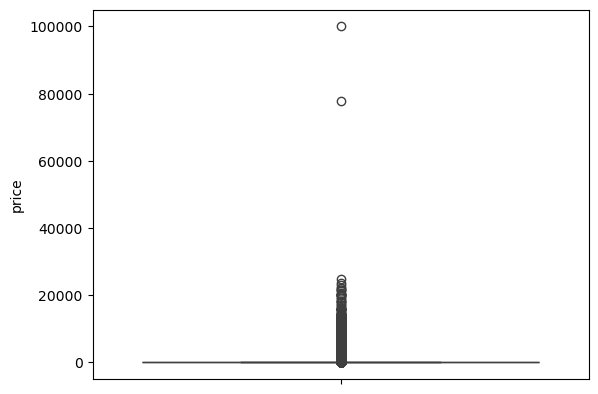

In [13]:
sns.boxplot(data = df['price'])
#Se aprecia que hay productos con el precio mucho más alto que el resto, por lo que en este box plot no se aprecia donde se agrupa la mayoría ya que el rango es muy alto a causa de los productos con precios extremos.

In [14]:
# Part 3: Unpacking Product Ratings

# Measures of Centrality:
print(df['stars'].mean())
print(df['stars'].median())
print(df['stars'].mode()[0])

2.152836472966066
0.0
0.0


In [ ]:
# Hay que tener en cuenta que hay muchos compradores que no han valorado los productos, por lo que eso hace que bajen mucho los valores anteriormente calculados.

In [15]:
rating_df = df[df['stars'] > 0]

print(rating_df['stars'].mean())
print(rating_df['stars'].median())
print(rating_df['stars'].mode()[0])

#En puntuaciones mayores a 0 (ya que se puede valorar de 1 a 5), la media está por encima de 4. La mediana y moda son un poco mayores que la media, por lo que la mayoría de productos reciben buenas valoraciones.

4.319160762226911
4.4
4.5


In [ ]:
# Measures of Dispersion:
print(rating_df['stars'].var())
print(rating_df['stars'].std())

Q1 = rating_df['stars'].quantile(0.25)
Q3 = rating_df['stars'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

#Vemos una baja variabilidad. El 50% central de las puntuaciones de concentra en un intervalo reducido (0.5), por lo que las opiniones de los clientes son consistentes. 

0.3083433752380519
0.5552867504614637
0.5


In [ ]:
# Shape of the Distribution:
print(rating_df['stars'].skew())
print(rating_df['stars'].kurt())

#El valor negativo de skewness indica una concentración de puntuaciones altas y una cola hacia valores bajos. Esto junto la kurtosis nos indica que la mayoría de productos reciben valoraciones altas y consistentes.

-2.379568112212799
9.78193769066435


<Axes: xlabel='stars', ylabel='Count'>

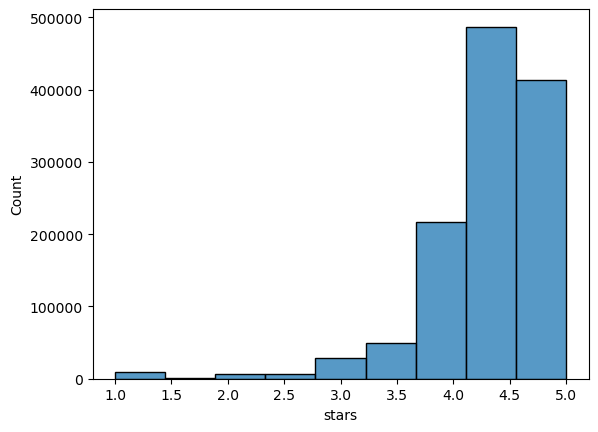

In [ ]:
# Visualizations:
sns.histplot(rating_df['stars'], bins=9)

#La puntuación más común está más o menos entre 4.2 y 4.6, seguida de 4.6 a 5 (Teniendo en cuenta que són valores aproximados).